
#Data Prepartion:
```
#data selection
```



In [ ]:
#import necessary libraries
import zipfile
import os
import cv2
import numpy as np
import shutil


In [ ]:
#Data selection and preparation

In [ ]:


# Define the path to the zip file and the extraction directory
zip_path = '/content/drive/MyDrive/selected_image500.zip'
extraction_dir = '/content/drive/MyDrive'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)


In [ ]:
###setting the 20% as the test and save them into different directory

# Specify the source directory and destination directory
source_dir = '/content/drive/MyDrive/selected_image500'
test_dir = '/content/drive/MyDrive/test'

# Ensure the test directory exists
os.makedirs(test_dir, exist_ok=True)

# List all files in the source directory
all_files = os.listdir(source_dir)

# Filter out only image files (assuming they have .jpg or .png extension)
image_files = [f for f in all_files if f.endswith('.jpg')]

# Sort image files by filename
sorted_images = sorted(image_files)

# Select the first 100 images
test_images = sorted_images[:100]

# Move or copy the selected images to the test directory
for image in test_images:
    src_path = os.path.join(source_dir, image)
    dest_path = os.path.join(test_dir, image)
    shutil.move(src_path, dest_path)

print(f"moved {len(test_images)} images to the test directory.")


In [ ]:
import cv2
import os

# Specify the image directory
image_dir = '/content/drive/MyDrive/selected_image500'
output_dir = '/content/drive/MyDrive/masked_threshold'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to create a mask for black squirrels using adaptive thresholding
def create_black_squirrel_mask(image, lower_threshold=100):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, lower_threshold, 255, cv2.THRESH_BINARY_INV)
    mask_black = cv2.bitwise_and(image, image, mask=mask)
    return mask_black

# Function to create a mask for gray squirrels using Otsu's thresholding
def create_gray_squirrel_mask(image, threshold=130):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, mask_gray = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY_INV)
    mask_gray = cv2.bitwise_and(image, image, mask=mask_gray)
    return mask_gray

# Counter for processed images
processed_filenames = []
processed_images = 0

# Iterate through each image in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith('.jpg'):
        try:
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Error loading image {filename}")
                continue

            # Create the appropriate mask based on the filename
            if 'black' in filename:
                mask = create_black_squirrel_mask(img)
            elif 'gray' in filename:
                mask = create_gray_squirrel_mask(img)
            else:
                print(f"Skipping image {filename}: No mask function available.")
                continue

            # Save the mask in the output directory
            mask_filename = os.path.splitext(filename)[0] + '.png'
            mask_path = os.path.join(output_dir, mask_filename)
            cv2.imwrite(mask_path, mask)

            processed_images += 1
            processed_filenames.append(filename)

        except Exception as e:
            print(f"Error processing image {filename}: {e}")

# Print the total number of processed images
print(f"Processed {processed_images} images. Squirrel masks creation complete.")
print("Processed filenames:", processed_filenames)


##Directory

In [ ]:
import os
import shutil

# Define paths
base_dir = '/content/drive/MyDrive/training_data withthres'
images_dir = os.path.join(base_dir, 'images')
masks_dir = os.path.join(base_dir, 'masks')

# Paths where your images and masks currently are
source_images_dir = '/content/drive/MyDrive/selected_image500'
source_masks_dir = '/content/drive/MyDrive/masked_threshold'

# Create directories if they do not exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(masks_dir, exist_ok=True)

# Move images to the new directory
for filename in os.listdir(source_images_dir):
    if filename.lower().endswith('.jpg'):  # Adjust extension as needed
        src_path = os.path.join(source_images_dir, filename)
        dest_path = os.path.join(images_dir, filename)
        shutil.move(src_path, dest_path)
        print(f"Moved {filename} to {images_dir}")

# Move masks to the new directory
for filename in os.listdir(source_masks_dir):
    if filename.lower().endswith('.png'):  # Adjust extension as needed
        src_path = os.path.join(source_masks_dir, filename)
        dest_path = os.path.join(masks_dir, filename)
        shutil.move(src_path, dest_path)
        print(f"Moved {filename} to {masks_dir}")

print("File organization complete.")


#preprocessing

In [ ]:
#import necessary libraries
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:


# Directory containing images
image_dataset_dir = '/content/drive/MyDrive/training_data withthres/images'
standard_size = (256, 256)

# Function to resize an image
def process_image(image):
    # Resize the image
    resized_image = cv2.resize(image, standard_size, interpolation=cv2.INTER_NEAREST)
    return resized_image

# Function to normalize images
def normalize_image(image):
    # Normalize the image to the range [0, 1]
    normalized_image = image / 255.0
    return normalized_image

# Initialize list to store processed images
images_dataset = []
image_counter = 0

# Process images
for root, _, files in os.walk(image_dataset_dir):
    for file_name in files:
        if file_name.lower().endswith('.jpg'):  # Adjust if image file format is different
            image_path = os.path.join(root, file_name)
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

                # Process and normalize the image
                image_resized = process_image(image)
                image_normalized = normalize_image(image_resized)

                # Append to dataset
                images_dataset.append(image_normalized)
                image_counter += 1
                print(f"Processed image: {file_name}")

            else:
                print(f"Error loading image: {image_path}")

print(f"Total number of images processed: {image_counter}")
print(f"Total number of images in images_dataset: {len(images_dataset)}")


Processed image: image_10032907_gray_lat_41.830033_long_-87.88149.jpg
Processed image: image_10033151_gray_lat_34.84479167_long_-92.462845.jpg
Processed image: image_10033864_gray_lat_34.84472833_long_-92.462775.jpg
Processed image: image_10043924_black_lat_45.86576167_long_-72.45561167.jpg
Processed image: image_10046707_gray_lat_51.50663597_long_-0.171985924.jpg
Processed image: image_100628720_gray_lat_38.62310223_long_-90.55221736.jpg
Processed image: image_10089788_gray_lat_40.768825_long_-73.97886667.jpg
Processed image: image_101149264_gray_lat_42.28476647_long_-85.61090532.jpg
Processed image: image_101884376_black_lat_43.49717101_long_-80.56863948.jpg
Processed image: image_101884862_black_lat_43.53610679_long_-80.57240296.jpg
Processed image: image_102262054_black_lat_39.98866959_long_-75.19603416.jpg
Processed image: image_10236415_gray_lat_-34.05335721_long_18.45642507.jpg
Processed image: image_102444582_black_lat_43.78221917_long_-79.38689972.jpg
Processed image: image_10

In [ ]:
import cv2
import os
import numpy as np

# Directory containing masks
mask_dataset_dir = '/content/drive/MyDrive/training_data withthres/masks'
standard_size = (256, 256)

# Function to process and resize a mask
def process_mask(mask):
    # Resize the mask
    resized_mask = cv2.resize(mask, standard_size, interpolation=cv2.INTER_NEAREST)
    return resized_mask

# Function to ensure mask has a single channel and normalize pixel values to 0 and 1
def prepare_mask(mask):
    # Ensure the mask is single-channel (grayscale)
    if len(mask.shape) == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # Normalize the mask to 0 and 1
    mask = (mask > 0).astype(np.float32)  # Convert to binary: 1 if >0 else 0

    # Expand dimensions if needed to add a channel dimension
    mask = np.expand_dims(mask, axis=-1)
    return mask

# Initialize list to store processed masks
masks_dataset = []
mask_counter = 0

# Process masks
for root, _, files in os.walk(mask_dataset_dir):
    for file_name in files:
        if file_name.lower().endswith('.png'):
            mask_path = os.path.join(root, file_name)
            mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
            if mask is not None:
                # Process the mask (resize)
                mask_resized = process_mask(mask)

                # Prepare the mask (ensure correct values and dimensions)
                mask_prepared = prepare_mask(mask_resized)

                # Append to dataset
                masks_dataset.append(mask_prepared)
                mask_counter += 1
                print(f"Processed mask: {file_name}")

            else:
                print(f"Error loading mask: {mask_path}")

print(f"Total number of masks processed: {mask_counter}")
print(f"Total number of masks in masks_dataset: {len(masks_dataset)}")

# Example to check min and max pixel values in the dataset
if masks_dataset:
    min_pixel_value = np.min([np.min(mask) for mask in masks_dataset])
    max_pixel_value = np.max([np.max(mask) for mask in masks_dataset])
    print(f"Min pixel value in masks_dataset: {min_pixel_value}")
    print(f"Max pixel value in masks_dataset: {max_pixel_value}")


Processed mask: image_10032907_gray_lat_41.830033_long_-87.88149.png
Processed mask: image_10033151_gray_lat_34.84479167_long_-92.462845.png
Processed mask: image_10033864_gray_lat_34.84472833_long_-92.462775.png
Processed mask: image_10043924_black_lat_45.86576167_long_-72.45561167.png
Processed mask: image_10046707_gray_lat_51.50663597_long_-0.171985924.png
Processed mask: image_100628720_gray_lat_38.62310223_long_-90.55221736.png
Processed mask: image_10089788_gray_lat_40.768825_long_-73.97886667.png
Processed mask: image_101149264_gray_lat_42.28476647_long_-85.61090532.png
Processed mask: image_101884376_black_lat_43.49717101_long_-80.56863948.png
Processed mask: image_101884862_black_lat_43.53610679_long_-80.57240296.png
Processed mask: image_102262054_black_lat_39.98866959_long_-75.19603416.png
Processed mask: image_10236415_gray_lat_-34.05335721_long_18.45642507.png
Processed mask: image_102444582_black_lat_43.78221917_long_-79.38689972.png
Processed mask: image_10255547_black_l

In [ ]:
#check normalization of image and mask dataset

# numpy array
images_dataset = np.array(images_dataset)

# the normalized data
print("Min pixel value:", images_dataset.min())
print("Max pixel value:", images_dataset.max())

#  all values are within the [0, 1] range
if np.all((images_dataset >= 0) & (images_dataset <= 1)):
    print("All pixel values are within the [0, 1] range.")
else:
    print("Some pixel values are out of the [0, 1] range.")

# numpy array
masks_dataset = np.array(masks_dataset)

#  normalized data
print("Min pixel value:", masks_dataset.min())
print("Max pixel value:", masks_dataset.max())

Min pixel value: 0.0
Max pixel value: 1.0
All pixel values are within the [0, 1] range.
Min pixel value: 0.0
Max pixel value: 1.0


In [ ]:
images_dataset=images_dataset
images_dataset=np.array(images_dataset)
#labels_dataset = np.expand_dims(labels_dataset.astype(np.uint8), axis=-1)
print(len(images_dataset))
print(images_dataset.shape)

images_dataset.dtype

500
(500, 256, 256, 3)


dtype('float64')

In [ ]:
masks_dataset=masks_dataset
masks_dataset=np.array(masks_dataset)
#labels_dataset = np.expand_dims(labels_dataset.astype(np.uint8), axis=-1)
print(len(masks_dataset))
print(masks_dataset.shape)

masks_dataset.dtype

500
(500, 256, 256, 1)


dtype('float32')

#Training

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(images_dataset, masks_dataset,
test_size=0.20, random_state=42)

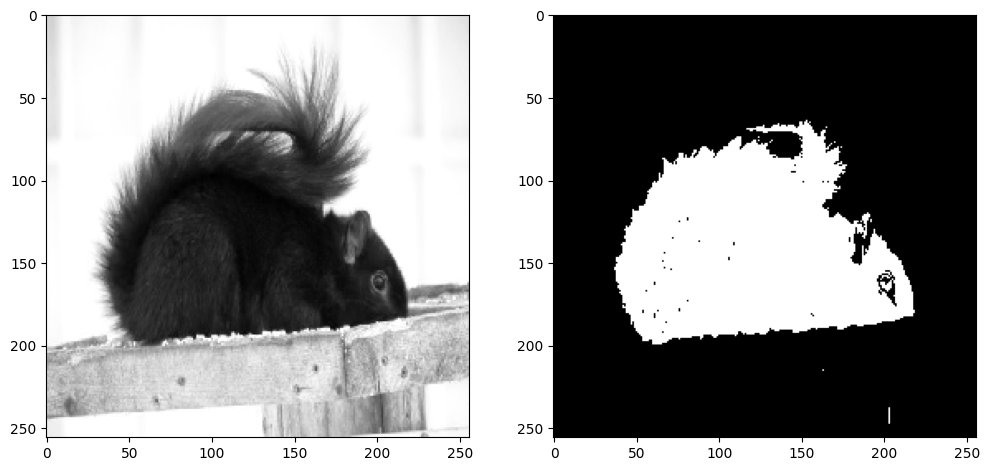

In [ ]:


#Sanity check
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(400, 256, 256, 3)
(100, 256, 256, 3)
(400, 256, 256, 1)
(100, 256, 256, 1)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
1


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, Dropout, concatenate
from tensorflow.keras.models import Model

def multi_unet_model(n_classes=1, image_height=256, image_width=256, image_channels=3):
    inputs = Input((image_height, image_width, image_channels))

    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    # For multi-label or binary classification, use sigmoid activation
    outputs = Conv2D(n_classes, (1,1), activation="sigmoid")(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [ ]:
model = multi_unet_model(n_classes=1, image_height=256, image_width=256, image_channels=3)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 16)   │            448 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 256, 256, 16)   │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 16)   │          2,320 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 16)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 64)     │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 32, 32, 128)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 128)    │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)    

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import keras
import tensorflow as tf

In [ ]:
tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='sum_over_batch_size',
    name='binary_crossentropy'
)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=["Accuracy"]
)


In [ ]:
callbacks_list = [
    # Commented out the EarlyStopping callback
    # keras.callbacks.EarlyStopping(
    #     monitor="val_loss",
    #     patience=2,
    # ),
    keras.callbacks.ModelCheckpoint(
        filepath="model.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 16,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[callbacks_list],
                    shuffle=False)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - Accuracy: 0.5103 - loss: 0.7037 - val_Accuracy: 0.5508 - val_loss: 0.6496
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - Accuracy: 0.5335 - loss: 0.6559 - val_Accuracy: 0.5500 - val_loss: 0.6219
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - Accuracy: 0.5420 - loss: 0.6373 - val_Accuracy: 0.5535 - val_loss: 0.6069
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - Accuracy: 0.5591 - loss: 0.6213 - val_Accuracy: 0.5857 - val_loss: 0.5873
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - Accuracy: 0.6633 - loss: 0.5789 - val_Accuracy: 0.6021 - val_loss: 0.6042
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - Accuracy: 0.7612 - loss: 0.4849 - val_Accuracy: 0.6443 - val_loss: 0.6060
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - Accuracy: 0.7653 - loss: 0.4698 - val_Accuracy: 0.6616 - val_loss: 0.5906
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - Accuracy: 0.7755 - loss: 0.4585 - val_Accuracy: 0.6719 - val_loss:

In [ ]:
history.history

{'Accuracy': [0.5169849395751953,
  0.5337117314338684,
  0.5415788292884827,
  0.5766425132751465,
  0.6826974749565125,
  0.7704037427902222,
  0.7779887318611145,
  0.786100447177887,
  0.8077775835990906,
  0.8204795718193054,
  0.8309653997421265,
  0.8314205408096313,
  0.8453967571258545,
  0.842057466506958,
  0.8559932112693787,
  0.8533099889755249,
  0.8590741157531738,
  0.8620180487632751,
  0.8641067743301392,
  0.8662223219871521,
  0.868090808391571,
  0.8701215386390686,
  0.8715814352035522,
  0.8731830716133118,
  0.874123752117157,
  0.8756402730941772,
  0.8774926662445068,
  0.8775250315666199,
  0.8792669773101807,
  0.8798305988311768,
  0.8801612257957458,
  0.8788315653800964,
  0.876341700553894,
  0.8756070137023926,
  0.8799542188644409,
  0.8804402351379395,
  0.8817479014396667,
  0.8822768926620483,
  0.8833392858505249,
  0.8837438821792603,
  0.8852148652076721,
  0.8852555155754089,
  0.8866260051727295,
  0.8867781758308411,
  0.88783860206604,
  0.8

#Plot

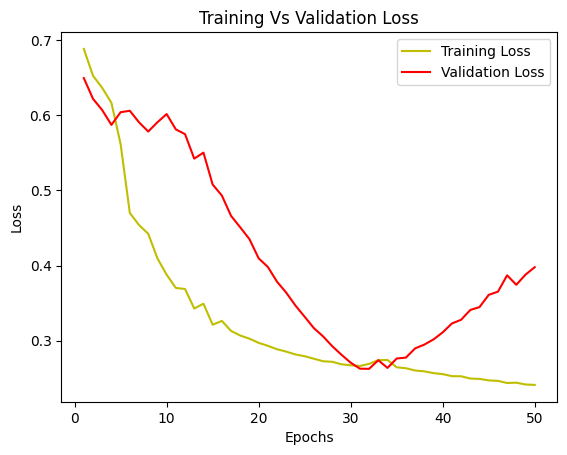

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/datasetbin/model.keras.h5")

In [ ]:
import keras
model = keras.models.load_model("/content/model.keras")


In [ ]:

#Intersection of Union
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.7936794


In [ ]:

threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction=model.predict(test_img_input)[0, :, :, 0]
print(prediction.shape)
prediction_thresholded = (prediction > threshold)

# Print unique values in the binary mask
unique_pred = np.unique(prediction_thresholded)
print(f"Unique values in model prediction: {unique_pred}")
plt.show()

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
(256, 256)
Unique values in model prediction: [False  True]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction shape: (1, 256, 256, 1)
Prediction min value: 9.918318392010406e-05
Prediction max value: 0.9998340606689453


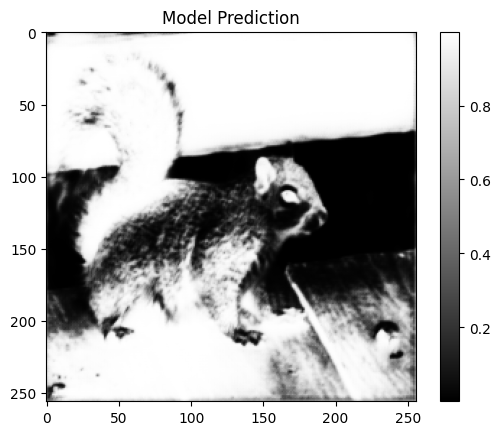

In [ ]:
# Assuming 'model' is your trained model and 'input_image' is your test input
prediction = model.predict(test_img_input)

print(f"Prediction shape: {prediction.shape}")
print(f"Prediction min value: {prediction.min()}")
print(f"Prediction max value: {prediction.max()}")

# Visualize the prediction
import matplotlib.pyplot as plt
plt.imshow(prediction[0, :, :, 0], cmap='gray')
plt.title('Model Prediction')
plt.colorbar()
plt.show()




(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
(256, 256)


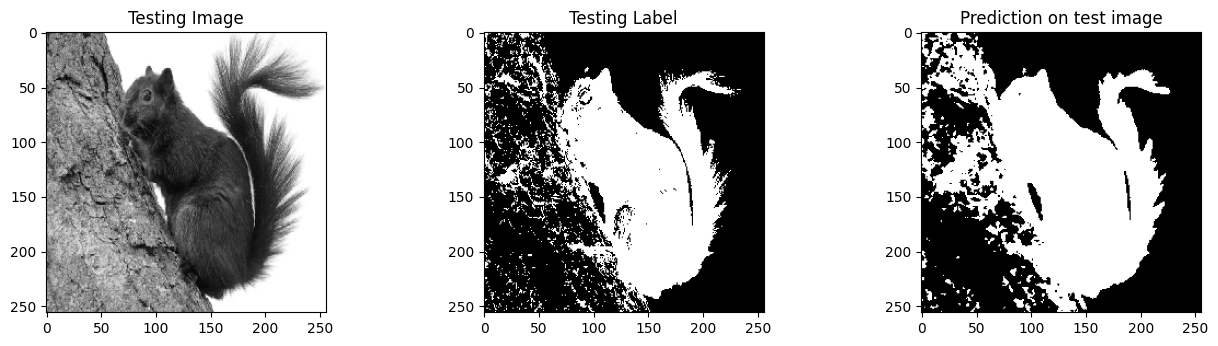

In [ ]:

threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]

ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > threshold).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()